# Welcome to the Data exploring and cleaning file

### First of all, we are going to open the files to observe them

In [1]:
import pandas as pd
import numpy as np
pd.set_option('float_format', '{:f}'.format)
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('ashrae-energy-prediction-Data/train.csv')
test = pd.read_csv('ashrae-energy-prediction-Data/test.csv', )
weather_train = pd.read_csv('ashrae-energy-prediction-Data/weather_train.csv')
weather_test = pd.read_csv('ashrae-energy-prediction-Data/weather_test.csv')
metadata = pd.read_csv('ashrae-energy-prediction-Data/building_metadata.csv')

### First Reduce memory

In [3]:
from pandas.api.types import is_datetime64_any_dtype as is_datetime
from pandas.api.types import is_categorical_dtype

def reduce_mem_usage(df, use_float16=False):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.        
    """
    
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))
    
    for col in df.columns:
        if is_datetime(df[col]) or is_categorical_dtype(df[col]):
            continue
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if use_float16 and c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [4]:
#Reduce Memory of datasets:

train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

weather_train = reduce_mem_usage(weather_train)
weather_test = reduce_mem_usage(weather_test)
metadata = reduce_mem_usage(metadata)

Memory usage of dataframe is 616.95 MB
Memory usage after optimization is: 173.90 MB
Decreased by 71.8%
Memory usage of dataframe is 1272.51 MB
Memory usage after optimization is: 358.65 MB
Decreased by 71.8%
Memory usage of dataframe is 9.60 MB
Memory usage after optimization is: 4.51 MB
Decreased by 53.0%
Memory usage of dataframe is 19.04 MB
Memory usage after optimization is: 8.96 MB
Decreased by 53.0%
Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.02 MB
Decreased by 65.4%


## Let's look the train and test files:

In [5]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000000
1,1,0,2016-01-01 00:00:00,0.000000
2,2,0,2016-01-01 00:00:00,0.000000
3,3,0,2016-01-01 00:00:00,0.000000
4,4,0,2016-01-01 00:00:00,0.000000


In [6]:
train.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750000
20216096,1445,0,2016-12-31 23:00:00,4.825000
20216097,1446,0,2016-12-31 23:00:00,0.000000
20216098,1447,0,2016-12-31 23:00:00,159.574997
20216099,1448,0,2016-12-31 23:00:00,2.850000


In [7]:
test.head()



,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [8]:
test.tail()

,row_id,building_id,meter,timestamp
41697595,41697595,1444,0,2018-05-09 07:00:00
41697596,41697596,1445,0,2018-05-09 07:00:00
41697597,41697597,1446,0,2018-05-09 07:00:00
41697598,41697598,1447,0,2018-05-09 07:00:00
41697599,41697599,1448,0,2018-05-09 07:00:00


We can oberve by using the tail that the train has the comsuption by hour of each day until 2016, and the test has the building id from 2017 until 2018

## Looking for the types and missing values

In [9]:
train.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [10]:
train.dtypes

building_id         int16
meter                int8
timestamp        category
meter_reading     float32
dtype: object

In [11]:
train.describe(include ='all')

,building_id,meter,timestamp,meter_reading
count,20216100.000000,20216100.000000,20216100,20216100.000000
unique,nan,nan,8784,nan
top,nan,nan,2016-12-27 22:00:00,nan
freq,nan,nan,2370,nan
mean,799.278000,0.662441,NaN,2117.121582
std,426.913309,0.930992,NaN,153235.625000
min,0.000000,0.000000,NaN,0.000000
25%,393.000000,0.000000,NaN,18.299999
50%,895.000000,0.000000,NaN,78.775002
75%,1179.000000,1.000000,NaN,267.984009


We can observe the DF is during the 2016, with a total of 1449 buildings and we do not observe any nan value in the DF

As we are going to use the time_series to observe the different ways the meters evolve during time, we are going to create the month, day week and the hour to make easy the group by for future analyse.

In [12]:
train.dtypes

building_id         int16
meter                int8
timestamp        category
meter_reading     float32
dtype: object

# Let's have a look to the weather:


In [13]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.000000,20.000000,nan,1019.700012,0.000000,0.000000
1,0,2016-01-01 01:00:00,24.400000,nan,21.100000,-1.000000,1020.200012,70.000000,1.500000
2,0,2016-01-01 02:00:00,22.799999,2.000000,21.100000,0.000000,1020.200012,0.000000,0.000000
3,0,2016-01-01 03:00:00,21.100000,2.000000,20.600000,0.000000,1020.099976,0.000000,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.000000,20.000000,-1.000000,1020.000000,250.000000,2.600000


In [14]:
weather_test.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.799999,4.000000,11.700000,nan,1021.400024,100.000000,3.600000
1,0,2017-01-01 01:00:00,17.799999,2.000000,12.800000,0.000000,1022.000000,130.000000,3.100000
2,0,2017-01-01 02:00:00,16.100000,0.000000,12.800000,0.000000,1021.900024,140.000000,3.100000
3,0,2017-01-01 03:00:00,17.200001,0.000000,13.300000,0.000000,1022.200012,140.000000,3.100000
4,0,2017-01-01 04:00:00,16.700001,2.000000,13.300000,0.000000,1022.299988,130.000000,2.600000


In [15]:
weather_train.shape

(139773, 9)

In [16]:
weather_test.shape

(277243, 9)

### Look for the types and empty values:

In [17]:
weather_train.dtypes

site_id                   int8
timestamp             category
air_temperature        float32
cloud_coverage         float32
dew_temperature        float32
precip_depth_1_hr      float32
sea_level_pressure     float32
wind_direction         float32
wind_speed             float32
dtype: object

In [18]:
weather_test.dtypes

site_id                   int8
timestamp             category
air_temperature        float32
cloud_coverage         float32
dew_temperature        float32
precip_depth_1_hr      float32
sea_level_pressure     float32
wind_direction         float32
wind_speed             float32
dtype: object

In [19]:
#Frequency of the features
for x in [weather_train,weather_test]:
    
    print(((x.isnull().sum()/len(x))*100).sort_values(ascending=False))
    print('''-------------------:''')
    

cloud_coverage       49.489529
precip_depth_1_hr    35.979052
sea_level_pressure    7.596603
wind_direction        4.484414
wind_speed            0.217496
dew_temperature       0.080845
air_temperature       0.039350
timestamp             0.000000
site_id               0.000000
dtype: float64
-------------------:
cloud_coverage       50.658808
precip_depth_1_hr    34.478057
sea_level_pressure    7.670167
wind_direction        4.461790
wind_speed            0.165919
dew_temperature       0.117947
air_temperature       0.037512
timestamp             0.000000
site_id               0.000000
dtype: float64
-------------------:


We observe the cloud_coverage has nearly the half of the information nan with 49.5% in the train and the test has a similar percentage of nan in the same column. We are going to drop the cloud_coverage and the precip_depth_1_hr.

In [20]:
for x in [weather_train,weather_test]:
    x.drop(['cloud_coverage','precip_depth_1_hr'], axis=1, inplace=True)

In [21]:
# Now the test:
weather_test.dtypes

site_id                   int8
timestamp             category
air_temperature        float32
dew_temperature        float32
sea_level_pressure     float32
wind_direction         float32
wind_speed             float32
dtype: object

In [22]:
weather_train.describe(include ='all')

,site_id,timestamp,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139773,139718.000000,139660.000000,129155.000000,133505.000000,139469.000000
unique,nan,8784,nan,nan,nan,nan,nan
top,nan,2016-12-31 23:00:00,nan,nan,nan,nan,nan
freq,nan,16,nan,nan,nan,nan,nan
mean,7.478977,NaN,14.418107,7.350158,1016.158081,180.526627,3.560527
std,4.604744,NaN,10.626595,9.790235,7.629684,111.523628,2.335874
min,0.000000,NaN,-28.900000,-35.000000,968.200012,0.000000,0.000000
25%,3.000000,NaN,7.200000,0.600000,1011.799988,80.000000,2.100000
50%,7.000000,NaN,15.000000,8.300000,1016.400024,190.000000,3.100000
75%,11.000000,NaN,22.200001,14.400000,1020.799988,280.000000,5.000000


We can see some extrange values: in the precip_depth, there is a values as 343. In wind_speed, is impossible to 
have 0 wind speed.

# Let's look the metadata:


In [23]:
metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.000000,nan
1,0,1,Education,2720,2004.000000,nan
2,0,2,Education,5376,1991.000000,nan
3,0,3,Education,23685,2002.000000,nan
4,0,4,Education,116607,1975.000000,nan


In [24]:
metadata.dtypes

site_id            int8
building_id       int16
primary_use    category
square_feet       int32
year_built      float32
floor_count     float32
dtype: object

In [25]:
#Frequency of the features
print(((metadata.isnull().sum()/len(metadata))*100).sort_values(ascending=False))
# as we see, more than 75% of the data is empty in the floor_count, we can drop because even we are not
# going to use it
metadata.drop(['floor_count'],axis =1,inplace=True)

floor_count   75.500345
year_built    53.416149
square_feet    0.000000
primary_use    0.000000
building_id    0.000000
site_id        0.000000
dtype: float64


In [26]:
metadata.groupby(['primary_use'], sort=True).count().sort_values(by='site_id', ascending=False)

,site_id,building_id,square_feet,year_built
primary_use,,,,
Education,549,549,549,326
Office,279,279,279,85
Entertainment/public assembly,184,184,184,73
Public services,156,156,156,51
Lodging/residential,147,147,147,85
Other,25,25,25,6
Healthcare,23,23,23,8
Parking,22,22,22,14
Warehouse/storage,13,13,13,5


We can see many different types of buidlings, which in this case, it will slow the process. we decide to group the 
lowest groupes inside the "Others" group, and preserve the first five groups which have more than 100 building in their location.

In [27]:
metadata.primary_use = metadata.primary_use.replace(['Healthcare', 'Parking', 'Warehouse/storage', 'Manufacturing/industrial', 
                                         'Retail','Services', 'Technology/science', 'Food sales and service',
                                         'Utility','Religious worship'],'Other')

We change the primary use feature to reduce que number of differents variables to 6, easier to analyse

We are going to merge the train and the metadata for obtaining the site_id, which is the id of the weather place, and then merge the weather dataset and drop the columns we are not going to us in this 

In [28]:
train_df = train.merge(metadata, on =['building_id'], how='left')
train_df = pd.merge(train_df,weather_train, left_on = ['site_id', 'timestamp'], right_on = ['site_id','timestamp'], how = 'left')

test_df = test.merge(metadata, on =['building_id'], how='left')
test_df = pd.merge(test_df,weather_test, left_on = ['site_id', 'timestamp'], right_on = ['site_id','timestamp'], how = 'left')



In [29]:
train_df

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.000000,0,Education,7432,2008.000000,25.000000,20.000000,1019.700012,0.000000,0.000000
1,1,0,2016-01-01 00:00:00,0.000000,0,Education,2720,2004.000000,25.000000,20.000000,1019.700012,0.000000,0.000000
2,2,0,2016-01-01 00:00:00,0.000000,0,Education,5376,1991.000000,25.000000,20.000000,1019.700012,0.000000,0.000000
3,3,0,2016-01-01 00:00:00,0.000000,0,Education,23685,2002.000000,25.000000,20.000000,1019.700012,0.000000,0.000000
4,4,0,2016-01-01 00:00:00,0.000000,0,Education,116607,1975.000000,25.000000,20.000000,1019.700012,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750000,15,Entertainment/public assembly,19619,1914.000000,1.700000,-5.600000,1008.500000,180.000000,8.800000
20216096,1445,0,2016-12-31 23:00:00,4.825000,15,Education,4298,nan,1.700000,-5.600000,1008.500000,180.000000,8.800000
20216097,1446,0,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1997.000000,1.700000,-5.600000,1008.500000,180.000000,8.800000
20216098,1447,0,2016-12-31 23:00:00,159.574997,15,Lodging/residential,29775,2001.000000,1.700000,-5.600000,1008.500000,180.000000,8.800000


In [30]:
#function to obtain dataframe with different datetime features:

def features_engineering(df):
    
    # Sort by timestamp
    df.sort_values("timestamp")
    df.reset_index(drop=True)
    
    # Add more features
    df["timestamp"] = pd.to_datetime(df["timestamp"],format="%Y-%m-%d %H:%M:%S")
    df['month'] = df['timestamp'].dt.month
    df["hour"] = df["timestamp"].dt.hour
    df["weekend"] = df["timestamp"].dt.weekday
    df['square_feet'] =  np.log1p(df['square_feet'])
    df['day'] = df["timestamp"].dt.dayofyear
    df.rename(columns={'timestamp':'time_serie'}, inplace = True)
    # Remove Unused Columns
    drop = ["sea_level_pressure", "wind_direction", "wind_speed"]
    df = df.drop(drop, axis=1)
    
    
    
    
    return df

In [31]:
train_machine_df = features_engineering(train_df)
#create DF for the primary use exploration with there proper name in the future:
train_df_use = train_machine_df

In [32]:
# Encode Categorical Data
le = LabelEncoder()
train_machine_df["primary_use"] = le.fit_transform(train_machine_df["primary_use"])

### Let's extract the train_df to predict the energy consumption 

In [33]:
#train_machine_df.to_csv('NEW_Data_Train&Test/train_df_ML.csv', index_label=False)

In [62]:
train_df.primary_use.unique()

array([0, 2, 3, 1, 4, 5])

# Data exploring part:

In [35]:
train_explore = train_machine_df


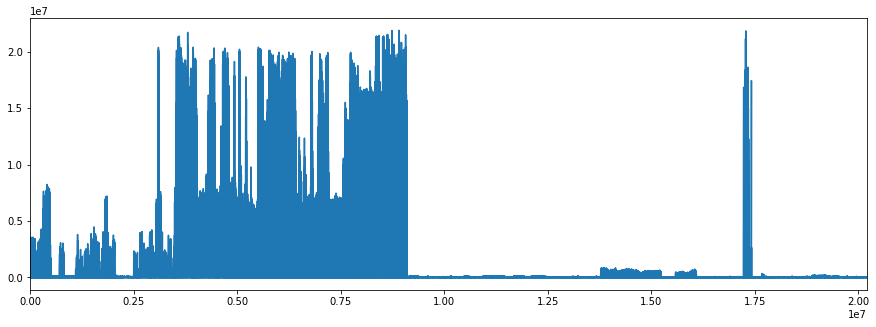

In [36]:
#Seeing the target for the prediction:

train_explore.meter.replace({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}, inplace=True)



plt.figure(figsize = (15,5))
train_explore['meter_reading'].plot()

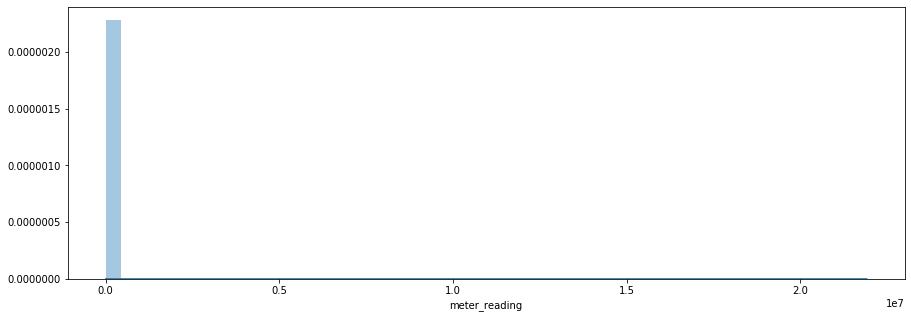

In [37]:
plt.figure(figsize = (15,5))
sns.distplot(train_explore['meter_reading'])

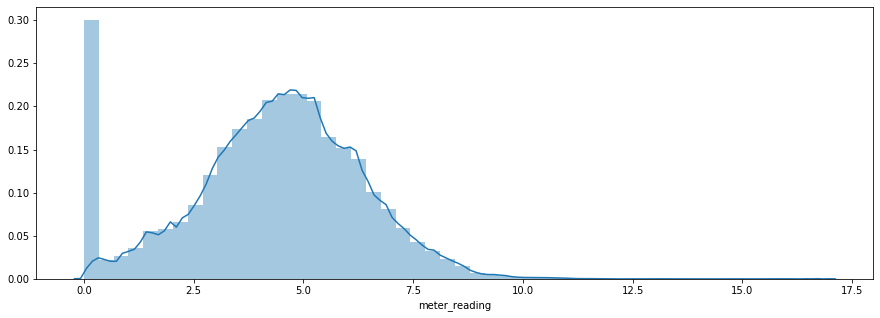

In [38]:
plt.figure(figsize = (15,5))
sns.distplot(np.log1p(train_explore['meter_reading']))

we can observe by doing a logarithm, a more normal distribution of the meter_reading

Let's see the metric quantities and highest values:


In [39]:
train_meter_count =train_explore.groupby('meter').count()
train_meter_count = train_meter_count.meter_reading.sort_values()
train_meter_count.index

Index(['hotwater', 'steam', 'chilledwater', 'electricity'], dtype='object', name='meter')

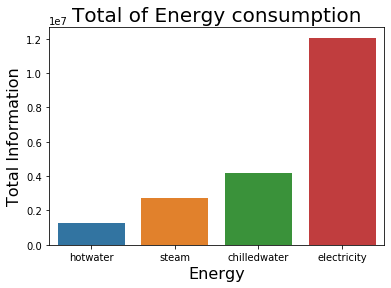

In [102]:
types_plot = sns.barplot(x = train_meter_count.index, y=train_meter_count, data=train_explore)
#axes.set(xlabel='Meters',ylabel='Frequency')
types_plot.axes.set_title("Total of Energy consumption",fontsize=20)
types_plot.set_xlabel("Energy",fontsize=16)
types_plot.set_ylabel("Total Information",fontsize=16)

plt.show()
## think metrics bins 

In [41]:
train_meter_sum =train_explore.groupby('meter').sum()
train_meter_sum = train_meter_sum.meter_reading.sort_values()
train_meter_sum.index

Index(['hotwater', 'electricity', 'chilledwater', 'steam'], dtype='object', name='meter')

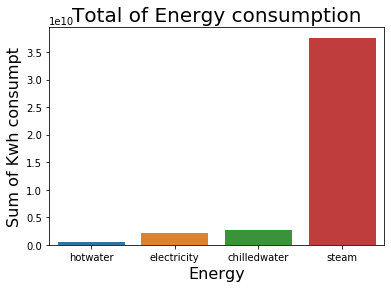

In [100]:
meter = sns.barplot(x = train_meter_sum.index, y=train_meter_sum, data=train_explore)
#axes.set(xlabel='Meters',ylabel='Sum of Kwh consumpt', fontsize=20)
meter.axes.set_title("Total of Energy consumption",fontsize=20)
meter.set_xlabel("Energy",fontsize=16)
meter.set_ylabel("Sum of Kwh consumpt",fontsize=16)

plt.show()

We can observe  the electricity is the variable with more entries in our dataset, however the steam is the meter with more quantity of Kwh use by all the building in 2016.

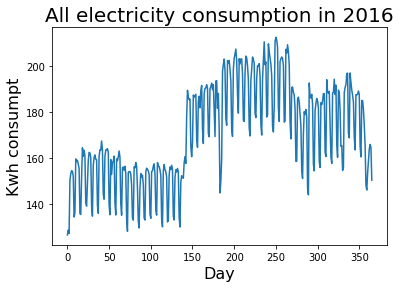

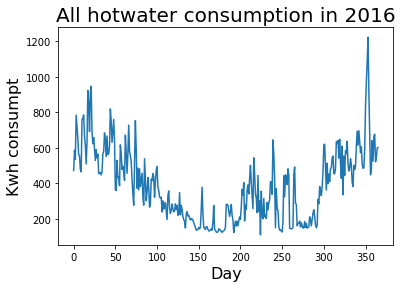

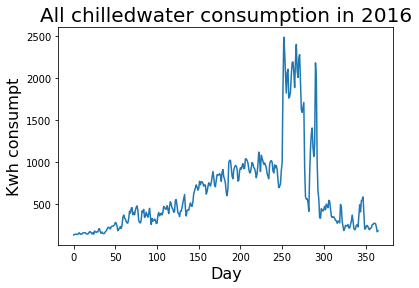

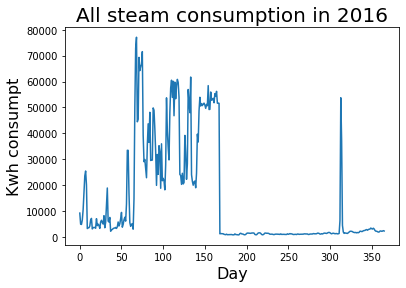

In [104]:
meter_list = ['electricity', 'hotwater', 'chilledwater','steam']

train_pop = train_explore.groupby( ['meter', 'day'],as_index=False).mean()
for types in meter_list:
    train_type = train_pop.loc[(train_pop.meter) == types].reset_index(drop=True)
    meter = sns.lineplot(data=train_explore, x = train_type.index, y = train_type.meter_reading )
    #axes.set(xlabel='Day',ylabel='Daily Consumption (KWh)', title=f"{types} use in 2016")
    meter.axes.set_title(f"All {types} consumption in 2016",fontsize=20)
    meter.set_xlabel("Day",fontsize=16)
    meter.set_ylabel("Kwh consumpt",fontsize=16)

    plt.show()

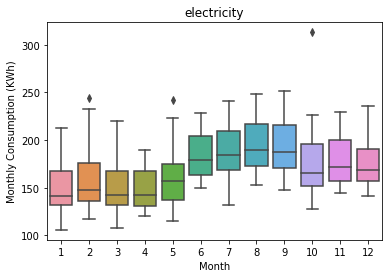

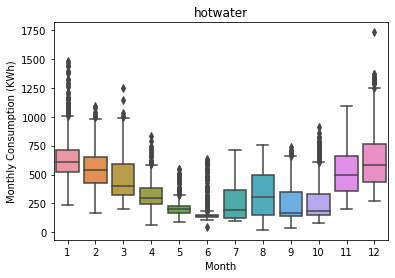

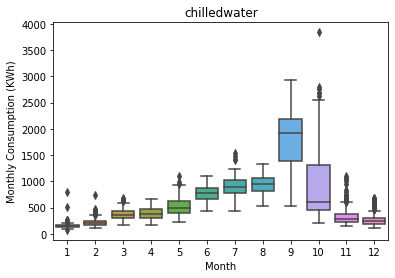

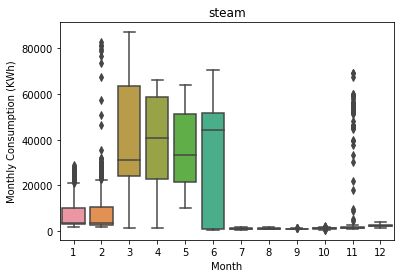

In [44]:
meter_list = ['electricity', 'hotwater', 'chilledwater','steam']

train_box_type = train_explore.groupby( ['meter', 'month','time_serie'],as_index=False).mean()
for types in meter_list:
    train_type = train_box_type.loc[(train_box_type.meter) == types].reset_index(drop=True)
    axes = sns.boxplot(data=train_type, x='month', y='meter_reading')
    axes.set(xlabel='Month',ylabel='Monthly Consumption (KWh)', title=f"{types}")
    
    plt.show()

#### Let's see for the different sites:


In [88]:
train_df.head()

,building_id,meter,time_serie,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,month,hour,weekend,day
0,0,0,2016-01-01,0.000000,0,Education,8.913685,2008.000000,25.000000,20.000000,1019.700012,0.000000,0.000000,1,0,4,1
1,1,0,2016-01-01,0.000000,0,Education,7.908755,2004.000000,25.000000,20.000000,1019.700012,0.000000,0.000000,1,0,4,1
2,2,0,2016-01-01,0.000000,0,Education,8.589886,1991.000000,25.000000,20.000000,1019.700012,0.000000,0.000000,1,0,4,1
3,3,0,2016-01-01,0.000000,0,Education,10.072639,2002.000000,25.000000,20.000000,1019.700012,0.000000,0.000000,1,0,4,1
4,4,0,2016-01-01,0.000000,0,Education,11.666573,1975.000000,25.000000,20.000000,1019.700012,0.000000,0.000000,1,0,4,1


In [46]:
train_df_site_min = train_df.groupby( ['site_id']).min().drop(['year_built'], axis=1)

In [47]:
train_df_site_min

,building_id,meter,meter_reading,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,month,hour,weekend,day
site_id,,,,,,,,,,,,,
0,0,0,0.000000,5.648974,1.700000,-9.400000,992.000000,0.000000,0.000000,1,0,0,1
1,105,0,0.000000,8.589514,-3.900000,-8.900000,973.299988,0.000000,0.000000,1,0,0,1
2,156,0,0.000000,6.930495,2.200000,-17.200001,999.299988,0.000000,0.000000,1,0,0,1
3,291,0,0.000000,6.687109,-10.600000,-22.799999,991.500000,0.000000,0.000000,1,0,0,1
4,565,0,0.000000,5.961005,1.100000,-9.400000,999.799988,0.000000,0.000000,1,0,0,1
5,656,0,0.000000,8.256867,-3.000000,-6.000000,nan,0.000000,0.000000,1,0,0,1
6,745,0,0.000000,9.511407,-13.300000,-23.299999,991.299988,0.000000,0.000000,1,0,0,1
7,789,0,0.000000,11.075722,-28.799999,-35.000000,983.599976,10.000000,0.000000,1,0,0,1
8,804,0,0.000000,5.877736,1.700000,-9.400000,992.000000,0.000000,0.000000,1,0,0,1


In [48]:
train_df_site_max = train_df.groupby( ['site_id']).max().drop(['year_built'], axis=1)

In [49]:
train_df_site_max

,building_id,meter,meter_reading,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,month,hour,weekend,day
site_id,,,,,,,,,,,,,
0,104,1,172611.000000,13.096910,36.099998,25.600000,1030.199951,360.000000,15.400000,12,23,6,366
1,155,3,22700.000000,12.070264,32.900002,20.700001,1045.500000,360.000000,18.500000,12,23,6,366
2,290,3,6895.629883,13.604210,47.200001,23.299999,1028.199951,360.000000,15.400000,12,23,6,366
3,564,0,3095.439941,13.653409,37.799999,26.100000,1040.900024,360.000000,17.000000,12,23,6,366
4,655,0,2293.879883,12.950117,35.000000,18.299999,1031.699951,360.000000,16.500000,12,23,6,366
5,744,0,954.099976,12.506307,30.000000,19.000000,nan,360.000000,18.500000,12,23,6,366
6,788,2,880374.000000,12.903595,37.200001,24.400000,1039.800049,360.000000,11.300000,12,23,6,366
7,803,3,17502.099609,13.546635,33.900002,22.900000,1043.800049,360.000000,12.800000,12,23,6,366
8,873,0,4373.169922,13.681980,36.099998,25.600000,1030.199951,360.000000,15.400000,12,23,6,366


In [50]:
train_df_site_mean = train_df.groupby( ['site_id']).mean().drop(['year_built'], axis=1)

### The different buildings locations:

In [87]:
train_df_site_mean

,building_id,meter,meter_reading,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,month,hour,weekend,day,Rain_chance
site_id,,,,,,,,,,,,,,
0,52.836768,0.156273,549.860779,10.698068,23.068506,17.057623,1017.960449,155.275253,3.357777,6.678876,11.504824,3.003983,188.526377,6.010883
1,128.682964,0.571286,149.531418,10.850859,11.711534,7.646251,1015.989929,195.583221,3.966999,6.513690,11.499985,3.008242,183.500811,4.065283
2,221.450340,0.912816,183.787949,11.142041,24.945501,4.078375,1011.677063,152.707809,2.931917,6.516556,11.502056,3.007514,183.589449,20.867126
3,427.253618,0.000000,125.919304,10.368939,15.525892,8.130531,1017.940308,185.033661,3.911292,6.516237,11.501741,3.007880,183.571897,7.395361
4,610.506526,0.000000,181.087799,10.935950,15.233129,9.902598,1016.893494,207.433929,3.845750,6.636392,11.495229,3.010040,187.270646,5.330530
5,700.000000,0.000000,31.298845,10.285524,10.867931,8.194676,nan,200.053192,4.768087,6.513661,11.500000,3.008197,183.500000,2.673255
6,765.874215,0.810149,990.833069,11.136001,15.409983,7.596686,1017.534912,131.131866,2.192967,6.640007,11.508278,3.002745,187.379477,7.813297
7,796.418244,1.143179,1217.419922,12.467017,7.931944,1.946083,1015.241272,208.919754,3.447555,6.527576,11.498581,3.009152,183.972137,5.985861
8,838.479001,0.000000,65.737808,8.977354,22.732834,16.677256,1018.023315,157.260468,3.387607,6.371755,11.501498,2.993584,179.307018,6.055578


In [52]:
train_df_site_mean['air_temperature'].sort_values(ascending=False)

site_id
2    24.945501
0    23.068506
8    22.732834
9    21.371838
3    15.525892
6    15.409983
4    15.233129
14   13.274580
1    11.711534
10   11.542968
5    10.867931
15   10.732724
13    9.878911
12    9.844043
7     7.931944
11    7.760880
Name: air_temperature, dtype: float32

In [53]:
train_df_site_mean['Rain_chance'] = train_df_site_mean['air_temperature'] - train_df_site_mean['dew_temperature']

In [54]:
train_df_site_mean['Rain_chance'].sort_values(ascending=True)

#we see that when the differents between both variables, more chance is the site or place to have more rains 
# the year.

site_id
5     2.673255
12    3.323585
1     4.065283
15    5.222237
4     5.330530
11    5.982581
7     5.985861
0     6.010883
8     6.055578
13    6.478264
9     6.753187
3     7.395361
14    7.484154
6     7.813297
10   11.510137
2    20.867126
Name: Rain_chance, dtype: float32

In [76]:
train_df_use['primary_use'] = le.inverse_transform(train_df_use.primary_use)
train_df_use.head()

,building_id,meter,time_serie,meter_reading,site_id,primary_use,square_feet,year_built,air_temperature,dew_temperature,month,hour,weekend,day
0,0,electricity,2016-01-01,0.000000,0,Education,8.913685,2008.000000,25.000000,20.000000,1,0,4,1
1,1,electricity,2016-01-01,0.000000,0,Education,7.908755,2004.000000,25.000000,20.000000,1,0,4,1
2,2,electricity,2016-01-01,0.000000,0,Education,8.589886,1991.000000,25.000000,20.000000,1,0,4,1
3,3,electricity,2016-01-01,0.000000,0,Education,10.072639,2002.000000,25.000000,20.000000,1,0,4,1
4,4,electricity,2016-01-01,0.000000,0,Education,11.666573,1975.000000,25.000000,20.000000,1,0,4,1


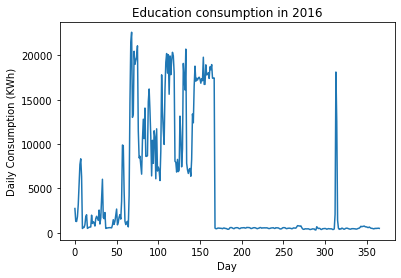

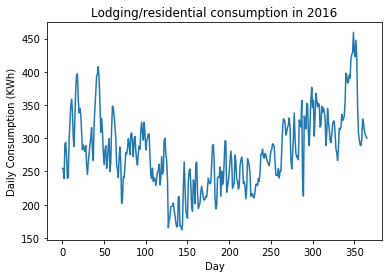

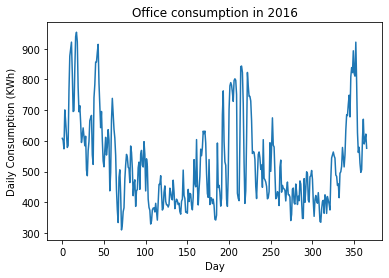

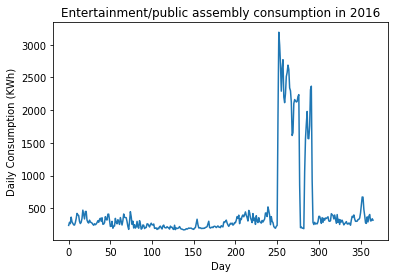

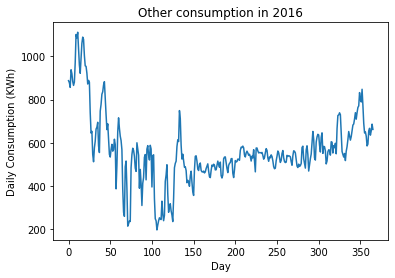

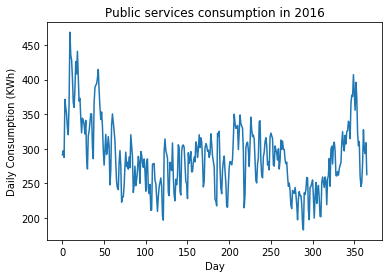

In [80]:
#We are going to use the Dataframe we create in the feature_engine function:

primary_list = list(train_df_use.primary_use.unique())
primary_list

train_pop = train_df_use.groupby( ['primary_use', 'day'],as_index=False).mean()

for types in primary_list:
    
    train_use = train_pop.loc[(train_pop.primary_use) == types].reset_index(drop=True)
    
    axes = sns.lineplot(data=train_df_use, x = train_use.index, y = train_use.meter_reading )
    
    axes.set(xlabel='Day',ylabel='Daily Consumption (KWh)', title=f"{types} consumption in 2016")
    
    plt.show()